In [1]:
import clear_data

Cleaning Credit.csv ...
Empty DataFrame
Columns: []
Index: []
Cleaning Credit_new (TARGET).csv ...
Empty DataFrame
Columns: []
Index: []


In [2]:
df = clear_data.df
df_test = clear_data.df_test

In [39]:
import numpy as np
import pandas as pd

# Обучене модели и подготовка данных
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc

import pylab as pl

import warnings
warnings.filterwarnings('ignore')

# визуализация
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(12,8)})

from pandas.plotting import scatter_matrix

In [5]:
# раздеение дф на х = все признаки кроме target и y = таргет
X = df[list(set(df.columns).difference(['TARGET']))]
y = df['TARGET'].astype('int')
feature_names = X.columns
#print (feature_names)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 777)
print(X_train.shape, y_train.shape)

(10199, 453) (10199,)


In [7]:
#model_rfc = RandomForestClassifier(n_estimators = 100) #в параметре передаем кол-во деревьев
model_rfc = RandomForestClassifier(random_state = 713,
                                   max_depth = 21, 
                                   min_samples_leaf = 8,
                                   min_samples_split = 2,
                                   n_estimators = 290)

In [8]:
model_knc = KNeighborsClassifier(n_neighbors = 13) #в параметре передаем кол-во соседей

In [9]:
model_lr = LogisticRegression(penalty='l2', tol=0.1) 

In [10]:
model_svc = svm.SVC() #по умолчанию kernek='rbf'

In [11]:
# модель GradientBoostingClassifier
model_gbt = GradientBoostingClassifier(learning_rate =  0.1,
                                 max_features = 9,
                                 min_samples_leaf = 2,
                                 min_samples_split = 2,
                                 n_estimators = 1200)

In [12]:
kfold = 5 #количество подвыборок для валидации
itog_val = {} #словарь для записи результатов кросс валидации разных алгоритмов

In [13]:
scores = cross_val_score(model_rfc, X, y, cv = kfold)
itog_val['RandomForestClassifier'] = scores.mean()


In [14]:
scores = cross_val_score(model_knc, X, y, cv = kfold)
itog_val['KNeighborsClassifier'] = scores.mean()


In [15]:
scores = cross_val_score(model_lr, X, y, cv = kfold)
itog_val['LogisticRegression'] = scores.mean()


In [16]:
scores = cross_val_score(model_svc, X, y, cv = kfold)
itog_val['SVC'] = scores.mean()


In [17]:
scores = cross_val_score(model_gbt, X, y, cv = kfold)
itog_val['GradientBoostingClassifier'] = scores.mean()


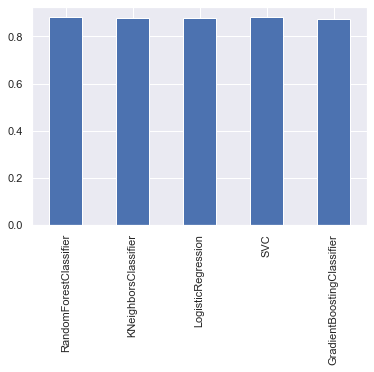

In [18]:
df.from_dict(data = itog_val, orient='index').plot(kind='bar', legend=False)

<Figure size 432x288 with 0 Axes>

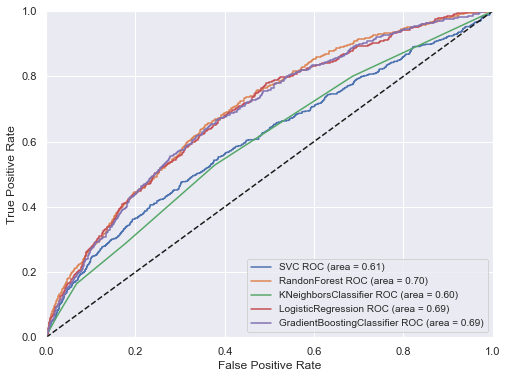

In [19]:
# прорисовка граффиков roc_auc, по моделям
pl.clf()
plt.figure(figsize=(8,6))


#SVC
model_svc.probability = True
probas = model_svc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('SVC', roc_auc))

#RandomForestClassifier
probas = model_rfc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandonForest',roc_auc))

#KNeighborsClassifier
probas = model_knc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('KNeighborsClassifier',roc_auc))

#LogisticRegression
probas = model_lr.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))

#GradientBoostingClassifier
probas = model_gbt.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('GradientBoostingClassifier',roc_auc))


pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])

pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='medium')
pl.show()

In [20]:
test_col = set(df_test.columns)
train_x_col = set(X.columns)

colm = [elem for elem in test_col if elem in train_x_col]


X_train = df[colm]
X_test = df_test[colm]
y_train = df['TARGET'].astype('int')
y_test = df_test['TARGET'].astype('int')

<Figure size 432x288 with 0 Axes>

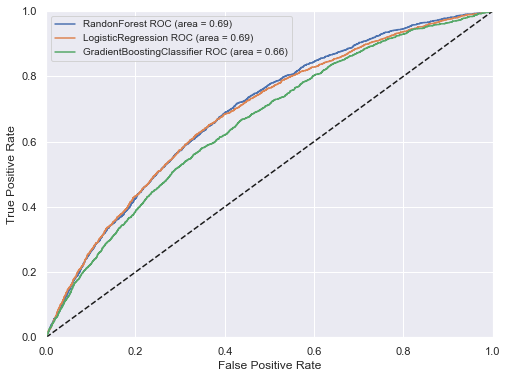

In [21]:
# прорисовка граффиков roc_auc, по моделям   
pl.clf()
plt.figure(figsize=(8,6))


#RandomForestClassifier
probas = model_rfc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandonForest',roc_auc))


#LogisticRegression
probas = model_lr.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',roc_auc))

#GradientBoostingClassifier
probas = model_gbt.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
pl.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('GradientBoostingClassifier',roc_auc))



pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])

pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc=0, fontsize='medium')
pl.show()

In [22]:
#RandomForestClassifier
probas = model_rfc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
print(roc_auc) #0.6911063829787234

0.6911063829787234


In [23]:
#LogisticRegression
probas = model_lr.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
print(roc_auc) #0.6865129830655666

0.6865129830655666


In [35]:
#model_rfc = RandomForestClassifier
model_rfc = RandomForestClassifier(random_state = 713,
                                   max_depth = 21, 
                                   min_samples_leaf = 6,
                                   min_samples_split = 2,
                                   n_estimators = 380)

#RandomForestClassifier
probas = model_rfc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)



print(roc_auc)   #0.6924899261832392


0.6924899261832392


In [40]:

# рабочий экспорт вероятности события 1 
out_predict_proba = model_rfc.predict_proba(X_test)[:,1]
#out_predict = rf.predict(df_test_out)
# экспорт
df_test['P'] = out_predict_proba
pd.DataFrame(df_test, columns=['P']).to_csv('../datasets/datasets_out/Credit_out.csv', sep = ';', index=True)




In [ ]:
model_lr = LogisticRegression(penalty='l1', tol=0.001, random_state=713) 
kf = KFold(n_splits=5, random_state=777, shuffle=True)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid = GridSearchCV(cv = kf,
             estimator = model_lr,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

grid.fit(X_train, y_train)


best_cv_err = 1 - grid.best_score_


print("ошибки при переборе параметра: {0:.2f}%".format(best_cv_err*100))


In [ ]:
grid.best_params_ 

In [ ]:

model_lr = LogisticRegression(penalty='l2', tol=0.1, random_state = 713) 
probas = model_lr.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc  = auc(fpr, tpr)
print(roc_auc)  #0.6865129830655666 - 0.1

In [ ]:
#Random Forest – случайный лес, поиск оптимальных значений параметров

n_estimators_list = [x for x in range(60, 210, 10)]
rf = RandomForestClassifier()

grid = GridSearchCV(rf, param_grid={'n_estimators': n_estimators_list})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_estimators = grid.best_estimator_.n_estimators

print("ошибки при переборе параметра: {0:.2f}%".format(best_cv_err*100))
print("лучшее значение коэфициента: {}".format(best_n_estimators))

In [ ]:
%%time
# подбор параметров для случайного леса
rf = RandomForestClassifier(n_estimators=1, random_state=707, verbose=0, n_jobs=3)
kf = KFold(n_splits=5, random_state=777, shuffle=True)
parameters = {'n_estimators': range(90, 500, 50),
              'max_depth': [5,7,9], 
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[2,4] }
grid = GridSearchCV(rf, parameters, cv=kf, scoring='roc_auc')
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_ 

In [ ]:
#Random Forest – случайный лес. С лучшими параметрами 
#rf = RandomForestClassifier(n_estimators = best_n_estimators)
rf = RandomForestClassifier(max_depth =9, 
                            min_samples_leaf = 4,
                            min_samples_split = 2,
                            n_estimators = 240)

rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("ошибки на обучающей: {0:.2f}%".format(err_train*100))
print("ошибки на тестовой: {0:.2f}%".format(err_test*100))

In [ ]:
#Отбор значимых признаков метода случайного леса
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

In [ ]:
# диаграмма с 50 значимыми признаками
d_first = 60
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [ ]:
# запоминаем лучшие 54 
best_features = indices[:54]
best_features_names = feature_names[best_features]

In [ ]:
best_features_names

In [ ]:
# разбиение по лучшим фичам(признакам) из модели леса
XX = df[list(best_features_names)]
y = df['TARGET'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 19)
print(X_train.shape, y_train.shape)



X_train = XX
X_test = df_testXX
y_train = df['TARGET'].astype('int')
y_test = df_test['TARGET'].astype('int')